In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.4 MB/s 
     |████████████████████████████████| 944 kB 37.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from dython import nominal

In [ ]:
data = pd.read_csv('/content/DF_all_materials.csv')

In [ ]:
material = "GLASS"

#glass density = 2.5 t/m3

data["vol_m"] = data[material] / 2.5
data["percentage"] = (data["vol_m"] / data["VOL"])*100

Drop columns not relevant for the current model

In [ ]:
data = data.drop(columns=['EGID', 'VAR_NAME', 'WOOD', 'METAL', 'MINERAL', 'ROOFTILE'])
print(data)
print(data.shape)

      VOL  AREA_F  APT_NUM  ST_NUM  KREIS  ZIPCODE ROOF   YOC          POC  \
0    1328     119        5       5     10     8049    P  1933  1919 - 1945   
1    1016     109        5       4     10     8049    P  1938  1919 - 1945   
2     915      95        1       4     11     8050    P  1933  1919 - 1945   
3     422      72        1       4     11     8050    P  1891       < 1919   
4    5010     215        3       5      9     8047    P  1952  1946 - 1960   
..    ...     ...      ...     ...    ...      ...  ...   ...          ...   
402  1172     176        5       3      9     8048    P  1949  1946 - 1960   
403  1168     175        4       3      9     8048    P  1949  1946 - 1960   
404  1202     173        5       3      9     8048    P  1949  1946 - 1960   
405  1801     179        6       4      9     8048    P  1950  1946 - 1960   
406  1953     183        6       4      9     8048    P  1950  1946 - 1960   

     GLASS  vol_m  percentage  
0      2.5    1.0    0.075301  

Statistical description of the data

In [ ]:
data.describe()


,VOL,AREA_F,APT_NUM,ST_NUM,KREIS,ZIPCODE,YOC,GLASS,material_n_m3,material_n_m2
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,238.000000,238.000000,238.000000
mean,1804.142506,172.208845,6.051597,4.665848,7.663391,8041.960688,1938.503686,9.595798,0.005768,0.056707
std,2600.570467,208.078881,11.296488,1.175023,3.108420,16.632315,19.557150,19.723077,0.011999,0.116432
min,74.000000,30.000000,1.000000,1.000000,2.000000,8002.000000,1850.000000,0.030000,0.000035,0.000244
25%,880.000000,109.500000,1.000000,4.000000,6.000000,8038.000000,1931.000000,1.920000,0.001441,0.013946
50%,1572.000000,165.000000,5.000000,5.000000,9.000000,8048.000000,1946.000000,4.065000,0.002435,0.026941
75%,2043.500000,184.000000,6.000000,5.000000,11.000000,8052.000000,1950.000000,7.500000,0.005480,0.046159
max,45753.000000,3865.000000,138.000000,11.000000,12.000000,8057.000000,1987.000000,192.310000,0.134483,1.299392


Eliminate NaN values

In [ ]:
print(data.shape)
data = data.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
print(data.shape)

(407, 12)
(238, 12)


In [ ]:
data.isnull().sum()


VOL              0
AREA_F           0
APT_NUM          0
ST_NUM           0
KREIS            0
ZIPCODE          0
ROOF             0
YOC              0
POC              0
GLASS            0
material_n_m3    0
material_n_m2    0
dtype: int64

In [ ]:
#SIZE AND STYLE

fontname = 'Liberation Sans'
horizontal = 20
title_size = 14
title_alg = 'center'
color = 'sandybrown'
spacing = 0.5
tpad = 15

#DATA
material = "GLASS"

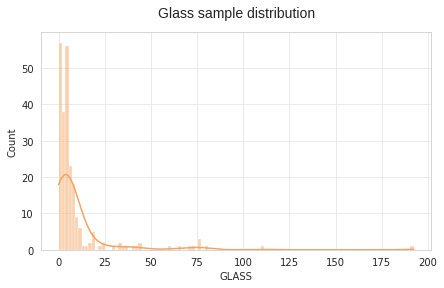

In [ ]:
#HISTOGRAM - LABEL
f = plt.figure(figsize=(7,4))

with sns.axes_style("whitegrid", {"grid.color": ".9"}):

    sns.histplot(data=data, x=material, kde=True, cbar = True, color = color).set_title(
  'Glass sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

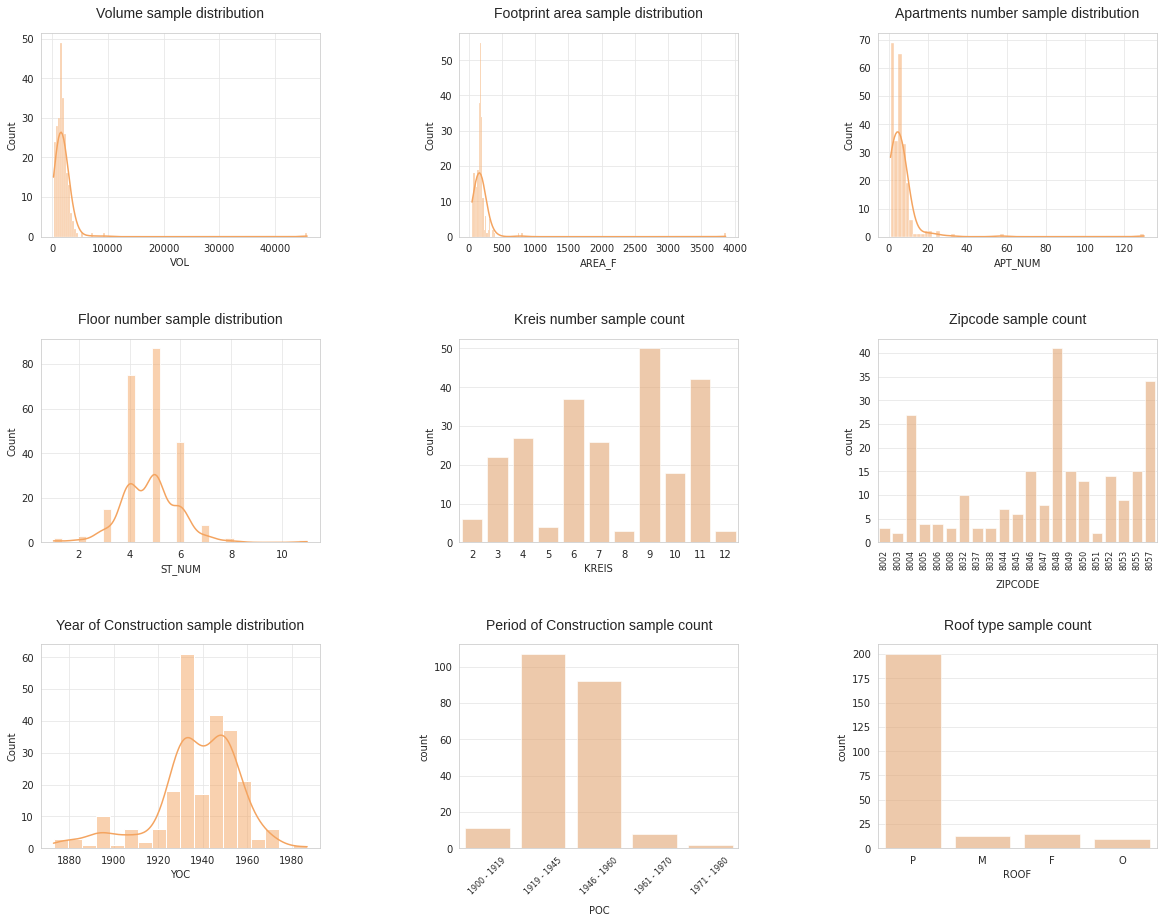

In [ ]:
#HISTOGRAMS - FEATURES

f = plt.figure(figsize=(20,15))
gs = f.add_gridspec(3, 3)
gs.update(wspace = spacing, hspace = spacing)

# FIRST ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=data, x="VOL", kde=True, cbar = True, color = color).set_title(
  'Volume sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=data, x="AREA_F", kde=True, cbar = True, color = color).set_title(
  'Footprint area sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.histplot(data=data, x="APT_NUM", kde=True, cbar = True, color = color).set_title(
  'Apartments number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

# SECOND ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 0])
    sns.histplot(data=data, x="ST_NUM", kde=True, cbar = True, color = color).set_title(
  'Floor number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 1])
    sns.countplot(data=data, x="KREIS", color = color, alpha  = 0.6).set_title(
  'Kreis number sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 2])
    sns.countplot(data=data, x="ZIPCODE", color = color, alpha  = 0.6).set_title(
  'Zipcode sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xticks(rotation=90, size = 8)
    ax.xaxis.labelpad=10.0

# THIRD ROW  

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 0])
    sns.histplot(data=data, x="YOC", kde=True, cbar = True, color = color).set_title(
  'Year of Construction sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 1])
    sns.countplot(data=data, x="POC", color = color, alpha  = 0.6, order = ["1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Period of Construction sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xticks(rotation=45, size = 8)
    ax.xaxis.labelpad=10.0
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 2])
    sns.countplot(data=data, x="ROOF", color = color, alpha  = 0.6).set_title(
  'Roof type sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)

Treat outliers with IQR


In [ ]:
# FUNCTION

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#GLASS

old = data.shape[0]
l_wood,u_wood = outlier_treatment(data.GLASS)
print('Lower-upper range for GLASS: ', l_wood,u_wood)

data.drop(data[(data.GLASS < l_wood) | (data.GLASS > u_wood)].index , inplace=True)
wood_data = data
new = data.shape[0]

print(wood_data.describe(), '\n')
print('Removed: ', old - new, '\n')

# VOLUME
old = new
l_vol,u_vol = outlier_treatment(wood_data.VOL)
print('Lower-upper range for VOL: ', l_vol, u_vol)

wood_data.drop(wood_data[(wood_data.VOL < l_vol) | (wood_data.VOL > u_vol)].index , inplace=True)
vol_data = wood_data
new = vol_data.shape[0]

print(vol_data.describe(), '\n')
print('Removed: ', old - new, '\n')

#FOOTPRINT
old = new
l_area,u_area = outlier_treatment(vol_data.AREA_F)
print('Lower-upper range for AREA_F: ', l_area, u_area,'\n')

vol_data.drop(vol_data[(vol_data.AREA_F < l_area) | (vol_data.AREA_F > u_area)].index , inplace=True)
area_data = vol_data
new = area_data.shape[0]

print(area_data.describe(),'\n')
print('Removed: ', old - new, '\n')

#APTS
old = new
l_apt,u_apt = outlier_treatment(area_data.APT_NUM)
print('Lower-upper range for APT_NUM: ', l_apt, u_apt,'\n')

area_data.drop(area_data[(area_data.APT_NUM < l_apt) | (area_data.APT_NUM > u_apt)].index , inplace=True)
apt_data = area_data
new =apt_data.shape[0]

print(apt_data.describe(),'\n')
print('Removed: ', old - new, '\n')

# YOC
old = new
l_YOC,u_YOC = outlier_treatment(vol_data.YOC)
print('Lower-upper range for YOC: ', l_YOC, u_YOC,'\n')

apt_data.drop(apt_data[(apt_data.YOC < l_YOC) | (apt_data.YOC > u_YOC)].index , inplace=True)
new_data = apt_data
new = new_data.shape[0]

print(new_data.describe(),'\n')
print('Removed: ', old - new, '\n')


Lower-upper range for GLASS:  -6.450000000000001 15.870000000000001
               VOL      AREA_F     APT_NUM      ST_NUM       KREIS  \
count   209.000000  209.000000  209.000000  209.000000  209.000000   
mean   1710.009569  166.315789    5.248804    4.712919    7.377990   
std    1013.643362   74.601543    4.214822    1.071428    2.829395   
min     226.000000   50.000000    1.000000    1.000000    2.000000   
25%    1010.000000  128.000000    2.000000    4.000000    5.000000   
50%    1561.000000  166.000000    5.000000    5.000000    7.000000   
75%    2223.000000  192.000000    8.000000    5.000000   10.000000   
max    9370.000000  798.000000   32.000000    7.000000   12.000000   

           ZIPCODE          YOC       GLASS       vol_m  percentage  
count   209.000000   209.000000  209.000000  209.000000  209.000000  
mean   8041.928230  1937.444976    4.111148    1.644459    0.116146  
std      18.112884    18.301904    3.050210    1.220084    0.117589  
min    8003.000000  1

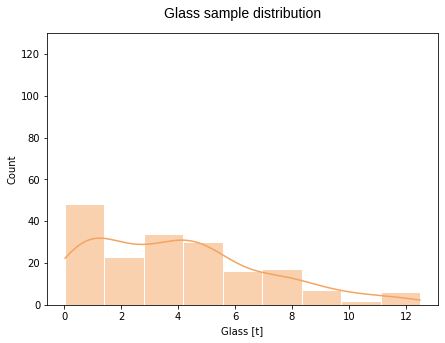

In [26]:
#HISTOGRAM - LABEL
f = plt.figure(figsize=(7,5))
gs = f.add_gridspec(1, 1)

ax = f.add_subplot(gs[0, 0])

with sns.axes_style("whitegrid", {"grid.color": ".9"}):

    sns.histplot(data=new_data, x=material, kde=True, cbar = True, color = color).set_title(
  'Glass sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Glass [t]')
    plt.ylim(0, 130)
f.savefig("g_label_dist.png")

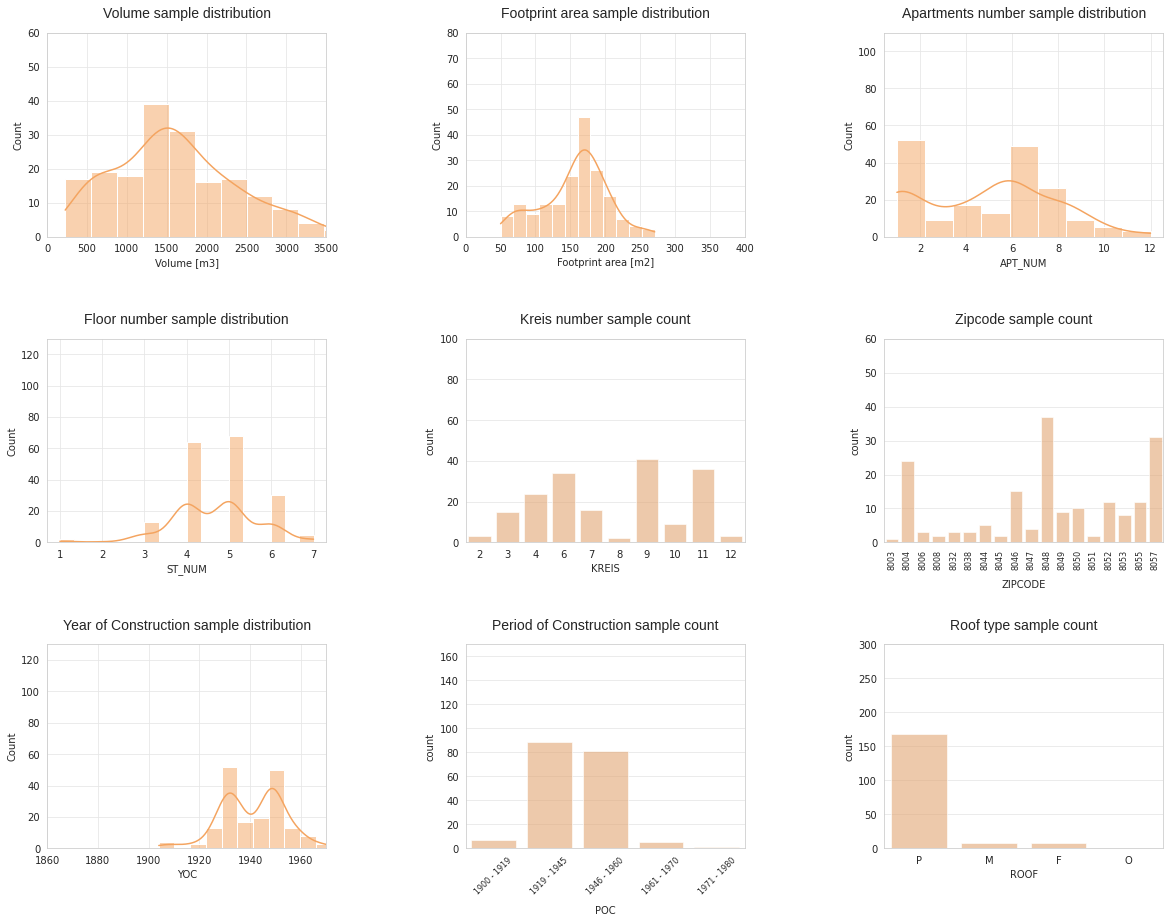

In [ ]:
#HISTOGRAMS - FEATURES

f = plt.figure(figsize=(20,15))
gs = f.add_gridspec(3, 3)
gs.update(wspace = spacing, hspace = spacing)

# FIRST ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=new_data, x="VOL", kde=True, cbar = True, color = color).set_title(
  'Volume sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]')
    plt.ylim(0, 60)
    plt.xlim(0, 3500)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=new_data, x="AREA_F", kde=True, cbar = True, color = color).set_title(
  'Footprint area sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]')
    plt.ylim(0, 80)
    plt.xlim(0, 400)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.histplot(data=new_data, x="APT_NUM", kde=True, cbar = True, color = color).set_title(
  'Apartments number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 110)

# SECOND ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 0])
    sns.histplot(data=new_data, x="ST_NUM", kde=True, cbar = True, color = color).set_title(
  'Floor number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 130)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 1])
    sns.countplot(data=new_data, x="KREIS", color = color, alpha  = 0.6).set_title(
  'Kreis number sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 100)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 2])
    sns.countplot(data=new_data, x="ZIPCODE", color = color, alpha  = 0.6).set_title(
  'Zipcode sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 60)
    plt.xticks(rotation=90, size = 8)
    ax.xaxis.labelpad=10.0

# THIRD ROW  

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 0])
    sns.histplot(data=new_data, x="YOC", kde=True, cbar = True, color = color).set_title(
  'Year of Construction sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xlim(1860, 1970)
    plt.ylim(0, 130)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 1])
    sns.countplot(data=new_data, x="POC", color = color, alpha  = 0.6, order = ["1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Period of Construction sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xticks(rotation=45, size = 8)
    ax.xaxis.labelpad=10.0
    plt.ylim(0, 170)
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 2])
    sns.countplot(data=new_data, x="ROOF", color = color, alpha  = 0.6).set_title(
  'Roof type sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 300)

f.savefig("g_features_dist.png")

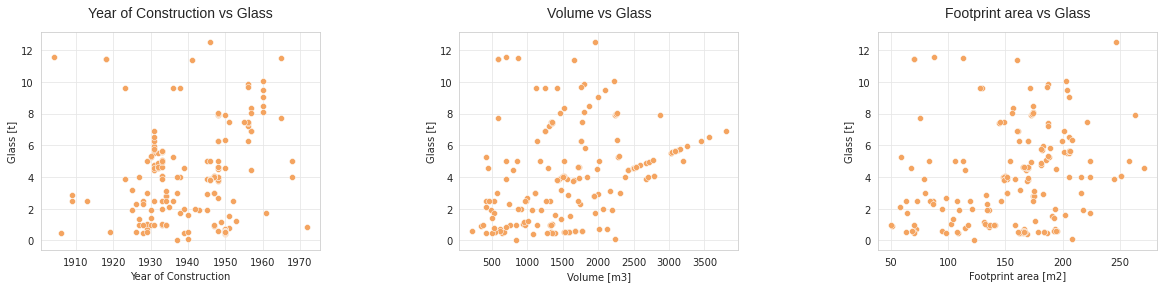

In [ ]:
#SCATTERPLOT CONTINUOUS DATA
f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = spacing, hspace = spacing)
material = "GLASS"

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.scatterplot(data=new_data, x="YOC", y = material, color = color).set_title(
  'Year of Construction vs Glass', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Year of Construction', ylabel = 'Glass [t]')
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.scatterplot(data=new_data, x="VOL", y = material, color = color).set_title(
  'Volume vs Glass', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]', ylabel = 'Glass [t]')
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.scatterplot(data=new_data, x="AREA_F", y = material, color = color).set_title(
  'Footprint area vs Glass', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]', ylabel = 'Glass [t]')
    
f.savefig("g_cont_scatter.png")


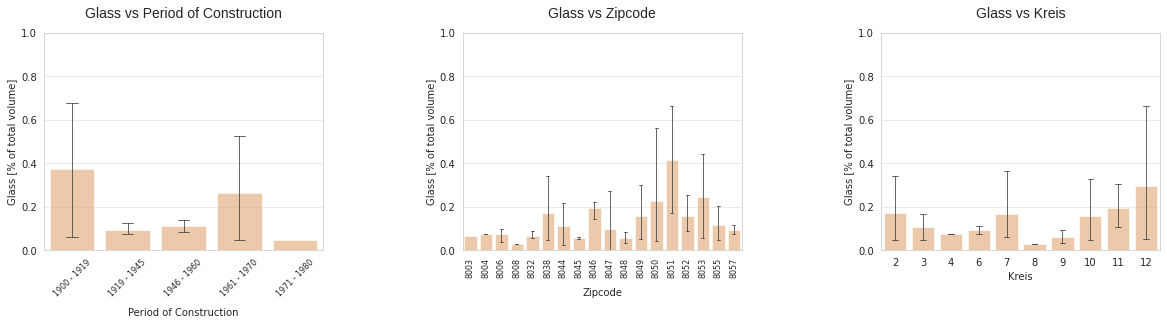

In [ ]:
#CATEGORICAL DATA

f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = spacing, hspace = spacing)
material = "GLASS"

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.barplot(data=new_data, x="POC", y = "percentage", color = color, alpha = 0.6, capsize=.2,errwidth=0.8,  ci = 100, order = ["1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Glass vs Period of Construction', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Period of Construction', ylabel = 'Glass [% of total volume]')
    plt.xticks(rotation=45, size = 8)
    ax.xaxis.labelpad=10.0
    plt.ylim(0, 1)
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.barplot(data=new_data, x="ZIPCODE", y = "percentage", color = color, alpha = 0.6,capsize=.2,errwidth=0.8,  ci = 100).set_title(
  'Glass vs Zipcode', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Zipcode', ylabel = 'Glass [% of total volume]')
plt.xticks(rotation=90, size = 8)
ax.xaxis.labelpad=10.0
plt.ylim(0, 1)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.barplot(data=new_data, x="KREIS", y = "percentage", color = color, alpha = 0.6,capsize=.2,errwidth=0.8,  ci = 100).set_title(
  'Glass vs Kreis', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Kreis', ylabel = 'Glass [% of total volume]')
    plt.ylim(0, 1)
    
f.savefig("g_categ_box.png")

Drop m / m3, m/m2

In [ ]:
new_data = new_data.drop(columns=['material_n_m2', 'material_n_m3'])

Correlation factor (nominal + numeric)

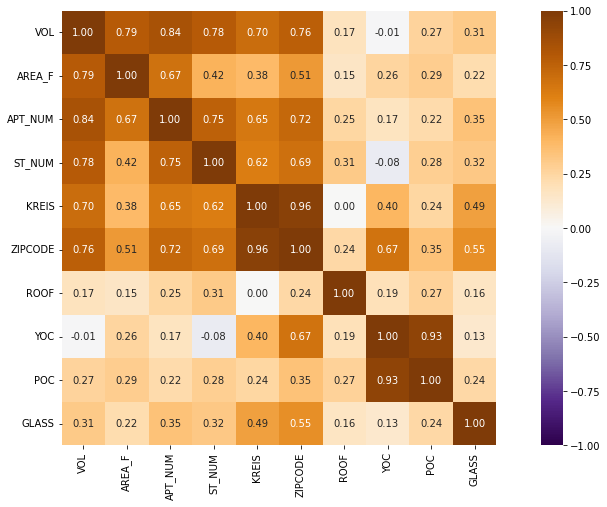

In [ ]:
# using dython library
from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio, associations
# Step 1: Instantiate a figure and axis object
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)

r = associations(new_data, nominal_columns=['ZIPCODE','ROOF', 'POC', 'KREIS'], numerical_columns=['VOL', 'YOC', 'AREA_F', 'GLASS', 'APT_NUM', 'ST_NUM'], symmetric_nom_nom = False, ax = ax, cmap = "PuOr_r")

#p = correlation_ratio(categories=data['ROOF'].tolist(), measurements=data['WOOD'].tolist())
#print(p)
#identify_nominal_columns(data)
#identify_numeric_columns(data)

fig.savefig("g_correl.png")

In [ ]:
print(new_data.shape)
print(new_data.head())

In [ ]:
from google.colab import files

new_data.to_csv('glass_n2.csv', encoding = 'utf-8-sig') 
files.download('glass_n2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>